<h1>Machine Learning Assignment 3</h1>

<h3> By Famba Abdulnassiir Siraji <br>
Reg No: Jan22/Comp/1195u Course Unit: J22.CS 507 Machine Learning
</h3>

<p> Use the Covid-19 historical data set found in the following URL to develop different models using Machine learning algorithms studied in class by taking total deaths as dependent variable. Hence evaluate the models.

https://covid19.who.int/table
</p>

<h2>Create Models to Predict global number of Covid-19 Deaths </h2>

<h3>Import Libralies we are going to use</h3>

In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

<h3> Imort our data set we downloaded set it ready for use </h3>

In [3]:
filename = './Data/WHO-COVID-19-global-table-data.csv'
df_covid = pd.read_csv(filename)

# View the first five rows of our data frame to comfirm it reads
df_covid.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Global,NaN,500186525,6417.139459,6448828,82.735193,948865,6190349,79.419038,21480,0.275578,4175,NaN
United States of America,Americas,79716960,24083.481000,214867,64.914000,28845,979321,295.865000,3658,1.105000,776,NaN
India,South-East Asia,43039023,3118.760000,7065,0.512000,1007,521737,37.807000,207,0.015000,1,NaN
Brazil,Americas,30183929,14200.231000,143800,67.652000,22724,661493,311.204000,965,0.454000,166,NaN
France,Europe,26525319,40783.488000,901637,1386.294000,146307,140558,216.112000,852,1.310000,152,NaN


In [4]:
#View last five rows
df_covid.tail()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Pitcairn Islands,Western Pacific,0,0.0,0,0.0,0,0,0.0,0,0.0,0,NaN
Saint Helena,Africa,0,0.0,0,0.0,0,0,0.0,0,0.0,0,NaN
Tokelau,Western Pacific,0,0.0,0,0.0,0,0,0.0,0,0.0,0,NaN
Turkmenistan,Europe,0,0.0,0,0.0,0,0,0.0,0,0.0,0,NaN
Tuvalu,Western Pacific,0,0.0,0,0.0,0,0,0.0,0,0.0,0,NaN


In [5]:
#checking Data shape
df_covid.shape

(238, 12)

<h4> Data Analysis <h4>

In [6]:
df_covid.describe()

,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
count,2.380000e+02,237.000000,2.380000e+02,237.000000,238.000000,2.380000e+02,237.000000,238.000000,237.000000,238.000000,0.0
mean,4.203248e+06,14461.142491,5.419183e+04,248.794081,7973.655462,5.201974e+04,109.830004,180.504202,0.574209,35.084034,NaN
std,3.304720e+07,15030.247719,4.343996e+05,704.944267,64033.589261,4.103113e+05,118.852491,1428.698537,1.583661,280.169421,NaN
min,0.000000e+00,0.000000,-4.000000e+00,-1.006000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN
25%,1.726925e+04,1185.381000,2.525000e+01,0.410000,0.000000,1.425000e+02,11.736000,0.000000,0.000000,0.000000,NaN
50%,1.595000e+05,9694.987000,2.830000e+02,11.918000,4.000000,1.466000e+03,68.545000,1.000000,0.015000,0.000000,NaN
75%,9.890312e+05,24083.481000,3.734000e+03,200.550000,369.000000,1.183250e+04,174.197000,21.750000,0.525000,2.000000,NaN
max,5.001865e+08,70926.021000,6.448828e+06,6518.365000,948865.000000,6.190349e+06,644.574000,21480.000000,18.117000,4175.000000,NaN


In [7]:
print("Number of NaN values for the column Name :", df_covid['Name'].isnull().sum())
print("Number of NaN values for the column WHO Region:", df_covid['WHO Region'].isnull().sum())
print("Number of NaN values for the column Cases  cumulative total:", df_covid['Cases - cumulative total'].isnull().sum())
print("Number of NaN values for the column Cases  cumulative total per 100000 population' :", df_covid['Cases - cumulative total per 100000 population'].isnull().sum())
print("Number of NaN values for the column Cases  newly reported in last 7 days per 100000 population :", df_covid['Cases - newly reported in last 7 days per 100000 population'].isnull().sum())
print("Number of NaN values for the column Cases  newly reported in last 24 hours:", df_covid['Cases - newly reported in last 24 hours'].isnull().sum())
print("Number of NaN values for the column Deaths  cumulative total:", df_covid['Deaths - cumulative total'].isnull().sum())
print("Number of NaN values for the column Deaths cumulative total per 100000 population :", df_covid['Deaths - cumulative total per 100000 population'].isnull().sum())
print("Number of NaN values for the column Deaths  newly reported in last 7 days :", df_covid['Deaths - newly reported in last 7 days'].isnull().sum())
print("Number of NaN values for the column Deaths  newly reported in last 24 hours :", df_covid['Deaths - newly reported in last 24 hours'].isnull().sum())


Number of NaN values for the column Name : 1
Number of NaN values for the column WHO Region: 0
Number of NaN values for the column Cases  cumulative total: 1
Number of NaN values for the column Cases  cumulative total per 100000 population' : 0
Number of NaN values for the column Cases  newly reported in last 7 days per 100000 population : 0
Number of NaN values for the column Cases  newly reported in last 24 hours: 0
Number of NaN values for the column Deaths  cumulative total: 1
Number of NaN values for the column Deaths cumulative total per 100000 population : 0
Number of NaN values for the column Deaths  newly reported in last 7 days : 1
Number of NaN values for the column Deaths  newly reported in last 24 hours : 238


<p> Noticed we have some NaN values with in our data that we have to do away with.
Drope the last Column completly of Deaths  newly reported in last 24 hours : 238 because it only contains NaN data.
</p>

<h4> Clean our data by removing the NaN </h4>

In [8]:
df_covid = df_covid.fillna(0)
df_covid.head()

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Global,0,500186525,6417.139459,6448828,82.735193,948865,6190349,79.419038,21480,0.275578,4175,0.0
United States of America,Americas,79716960,24083.481000,214867,64.914000,28845,979321,295.865000,3658,1.105000,776,0.0
India,South-East Asia,43039023,3118.760000,7065,0.512000,1007,521737,37.807000,207,0.015000,1,0.0
Brazil,Americas,30183929,14200.231000,143800,67.652000,22724,661493,311.204000,965,0.454000,166,0.0
France,Europe,26525319,40783.488000,901637,1386.294000,146307,140558,216.112000,852,1.310000,152,0.0


In [9]:
to_drop = ['Deaths - newly reported in last 24 hours']
df_covid.drop(to_drop, inplace= True, axis =1)

<h4> Define correlation between the data</h4>

In [10]:
df_covid.corr()

,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population
WHO Region,1.000000,-0.008030,0.965099,-0.006711,0.963658,0.995468,0.029998,0.991658,0.002303,0.985400
Cases - cumulative total,-0.008030,1.000000,0.016239,0.360430,0.015275,-0.028030,0.485703,-0.003556,0.217178,0.001907
Cases - cumulative total per 100000 population,0.965099,0.016239,1.000000,0.056122,0.998296,0.947918,0.001755,0.973469,0.033786,0.963509
Cases - newly reported in last 7 days,-0.006711,0.360430,0.056122,1.000000,0.054474,-0.023898,-0.046115,0.009363,0.230118,0.007712
Cases - newly reported in last 7 days per 100000 population,0.963658,0.015275,0.998296,0.054474,1.000000,0.946557,0.003449,0.971519,0.034498,0.963143
Cases - newly reported in last 24 hours,0.995468,-0.028030,0.947918,-0.023898,0.946557,1.000000,0.049836,0.985528,-0.007094,0.977647
Deaths - cumulative total,0.029998,0.485703,0.001755,-0.046115,0.003449,0.049836,1.000000,0.032080,0.117292,0.030291
Deaths - cumulative total per 100000 population,0.991658,-0.003556,0.973469,0.009363,0.971519,0.985528,0.032080,1.000000,0.024167,0.994176
Deaths - newly reported in last 7 days,0.002303,0.217178,0.033786,0.230118,0.034498,-0.007094,0.117292,0.024167,1.000000,0.029980
Deaths - newly reported in last 7 days per 100000 population,0.985400,0.001907,0.963509,0.007712,0.963143,0.977647,0.030291,0.994176,0.029980,1.000000


<AxesSubplot:>

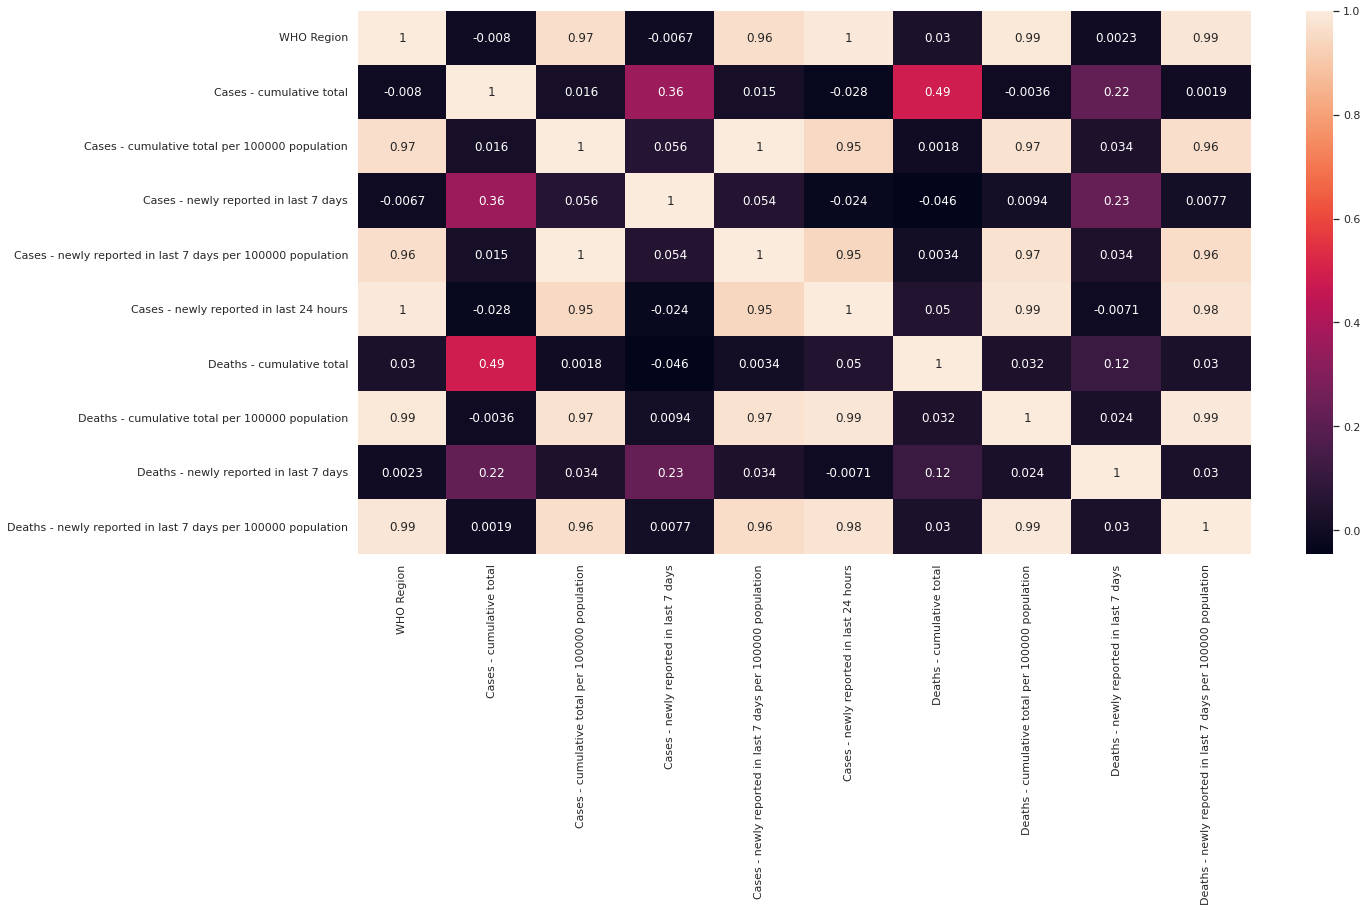

In [11]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df_covid.corr(), annot=True)

<p> From the Correlation data. <br>
The correlation between Death Cumlative total and Cases cumulative total is strongly positive as seen by the coefficient of 0.482511. 
</p>

<h2>Develop Model with Linear Regression Methods <h2>

In [12]:
from sklearn.linear_model import LinearRegression 
%matplotlib inline

In [13]:
X = df_covid[['Cases - cumulative total']] 
Y = df_covid['Deaths - cumulative total'] 
lm = LinearRegression() 
lm 
lm.fit(X,Y)
lm.score(X, Y)

0.23590717798594563

<h3> Use Identifeid cases to help us predict deaths <h3>

In [14]:
X = df_covid[['Cases - cumulative total']] 
Y = df_covid['Deaths - cumulative total'] 
lm = LinearRegression() 
lm 
lm.fit(X,Y)
Yhat = lm.predict(X)
Yhat[0:5]

array([ 78.71175602, 146.55300536,  66.04551255, 108.59992798,
       210.68339344])

In [15]:
#intercept Value
print(f'The intercep Value is {lm.intercept_}')

#what is the Slope
print(f'The value of the slope is {lm.coef_} ')


The intercep Value is 54.069033191537315
The value of the slope is [0.00384014] 


<h3>Lets plot our Graph </h3>

In [16]:
print(df_covid.dtypes)

Name                                                             object
WHO Region                                                        int64
Cases - cumulative total                                        float64
Cases - cumulative total per 100000 population                    int64
Cases - newly reported in last 7 days                           float64
Cases - newly reported in last 7 days per 100000 population       int64
Cases - newly reported in last 24 hours                           int64
Deaths - cumulative total                                       float64
Deaths - cumulative total per 100000 population                   int64
Deaths - newly reported in last 7 days                          float64
Deaths - newly reported in last 7 days per 100000 population      int64
dtype: object


(0.0, 676.8027000000001)

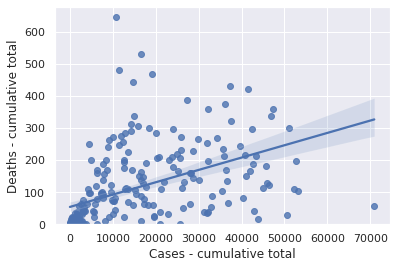

In [17]:
sns.regplot(x="Cases - cumulative total", y="Deaths - cumulative total", data=df_covid)
plt.ylim(0,)

<h3>Measures for In-Sample Evaluation of Linear Regression</h3>

<h3>R-Squared</h3>

In [18]:
X = df_covid[['Cases - cumulative total']] 
Y = df_covid['Deaths - cumulative total'] 
lm = LinearRegression() 
lm 
lm.fit(X,Y)
lm.score(X, Y)

0.23590717798594563

<p> ~23.5% of the variation of the Death is explained by this simple Linear Model</p>

<h3>Mean Squared Error (MSE)</h3>

In [19]:
Yhat =lm.predict(X)
print(Yhat[0:5])

[ 78.71175602 146.55300536  66.04551255 108.59992798 210.68339344]


In [20]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_covid['Deaths - cumulative total'],Yhat)
print(f'The Mean square error of Deaths - cumulative total and Preicted value is {mse}')

The Mean square error of Deaths - cumulative total and Preicted value is 10741.372233248636


<h2>Multiple Linear Regression</h2>

<h3>If we want to predict Deaths with more than one Variable we can use multiple linear regression.</h3>

<h4>Lets Develop a Model using these as the predictor Values </h4>

In [21]:
Z = df_covid[['Cases - cumulative total','Cases - newly reported in last 7 days','Cases - newly reported in last 24 hours']]

#fit it in a model
lm.fit(Z, df_covid['Deaths - cumulative total'])

LinearRegression()

In [22]:
#intercept Value
print(f'The intercep Value is {lm.intercept_}')

#what is the Slope
print(f'The value of the slope is {lm.coef_} ')

The intercep Value is 53.17567849438611
The value of the slope is [ 4.57511661e-03 -4.27628362e-02  1.73755093e-05] 


<h3> Deaths _cumulative total = 53.17 + 4.57511*Cases - cumulative total + -4.2762*Cases - newly reported in last 7 days + 1.7375* Cases - newly reported in last 24 hours </h3>

<P> Please note these cases will keep changing as the data changes with time </P>

<h3>Measures for In-Sample Evaluation of Multiple Linear Regression</h3>

<h2>R-2</h2>

In [23]:
# fit the model 
lm.fit(Z, df_covid['Deaths - cumulative total'])
# Find the R^2
print('The R-square is: ', lm.score(Z, df_covid['Deaths - cumulative total']))

The R-square is:  0.2957269723441458


<p>We can say that ~29.8 % of the variation of Deaths _cumulative total is explained by this multiple linear regression "multi_fit"</p>

<h3>Let's calculate the MSE for Multiple linear Regression </h3>

In [24]:
Y_predict_multifit = lm.predict(Z)

In [25]:
print('The mean square error of price and predicted value using multifit is: ', \
      mean_squared_error(df_covid['Deaths - cumulative total'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  9900.444718154147


<h2>Conclusion</h2>

<p>Comparing these three models, we conclude that the Multiple Linear Regression model is the best model to be able to predict Deaths from our dataset. This result makes sense, since we have 3 variables in total, and we know that more than one of those variables are potential predictors of the final numbers of Deaths. </p>

<h2>Using other machine Learning Algorithms </h2>

<h3>Feature Before Encoding </h3>

In [26]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [27]:
df_covid[['Name','Deaths - cumulative total','Cases - cumulative total','Cases - newly reported in last 7 days','Cases - newly reported in last 24 hours']].head()

,Name,Deaths - cumulative total,Cases - cumulative total,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours
Global,0,79.419038,6417.139459,82.735193,6190349
United States of America,Americas,295.865000,24083.481000,64.914000,979321
India,South-East Asia,37.807000,3118.760000,0.512000,521737
Brazil,Americas,311.204000,14200.231000,67.652000,661493
France,Europe,216.112000,40783.488000,1386.294000,140558


In [28]:
#Convert Categorical Variables to binary Variables and Append themto the Feature Data Frame.

Feature = df_covid[['Cases - cumulative total','Deaths - cumulative total']]
Feature = pd.concat([Feature,pd.get_dummies(df_covid['Name'])], axis=1)

<h2>Feature Selection </h2>

<h4> Define feature sets, X: <h4>

In [29]:
X = Feature
X[0:5]

,Cases - cumulative total,Deaths - cumulative total,0,Africa,Americas,Eastern Mediterranean,Europe,Other,South-East Asia,Western Pacific
Global,6417.139459,79.419038,1,0,0,0,0,0,0,0
United States of America,24083.481000,295.865000,0,0,1,0,0,0,0,0
India,3118.760000,37.807000,0,0,0,0,0,0,1,0
Brazil,14200.231000,311.204000,0,0,1,0,0,0,0,0
France,40783.488000,216.112000,0,0,0,0,1,0,0,0


<h3> What are our Labels </h3>

In [30]:
y = df_covid['Name'].values
y[0:5]

array([0, 'Americas', 'South-East Asia', 'Americas', 'Europe'],
      dtype=object)

In [31]:
y_collection = df_covid['Name'].replace(to_replace=['Americas', 'South-East Asia','Americas','Europe'], value=[3,2,1,0]).values
y_collection[0:5]

array([0, 1, 2, 1, 0], dtype=object)

In [32]:
#Normalise the Data

from sklearn.preprocessing import StandardScaler
X_initial = X
scaler = preprocessing.StandardScaler().fit(X_initial)
X= scaler.transform(X)
X[0:10]

array([[-5.32352263e-01, -2.52599616e-01,  1.53948043e+01,
        -5.15710623e-01, -5.54700196e-01, -3.19142369e-01,
        -5.93525675e-01, -6.49569802e-02, -2.20132119e-01,
        -4.15227399e-01],
       [ 6.45705095e-01,  1.57294589e+00, -6.49569802e-02,
        -5.15710623e-01,  1.80277564e+00, -3.19142369e-01,
        -5.93525675e-01, -6.49569802e-02, -2.20132119e-01,
        -4.15227399e-01],
       [-7.52300472e-01, -6.03563289e-01, -6.49569802e-02,
        -5.15710623e-01, -5.54700196e-01, -3.19142369e-01,
        -5.93525675e-01, -6.49569802e-02,  4.54272645e+00,
        -4.15227399e-01],
       [-1.33467723e-02,  1.70231787e+00, -6.49569802e-02,
        -5.15710623e-01,  1.80277564e+00, -3.19142369e-01,
        -5.93525675e-01, -6.49569802e-02, -2.20132119e-01,
        -4.15227399e-01],
       [ 1.75932367e+00,  9.00294253e-01, -6.49569802e-02,
        -5.15710623e-01, -5.54700196e-01, -3.19142369e-01,
         1.68484708e+00, -6.49569802e-02, -2.20132119e-01,
        -4.

<h2> Decission Tree (DT) </h2>

In [33]:
!pip install six

In [34]:
!pip install pydotplus

In [35]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO

In [36]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [37]:
#Build an Empty Decision Tree
CovidTree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
CovidTree

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [38]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler 
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]


array([[-5.32352263e-01, -2.52599616e-01,  1.53948043e+01,
        -5.15710623e-01, -5.54700196e-01, -3.19142369e-01,
        -5.93525675e-01, -6.49569802e-02, -2.20132119e-01,
        -4.15227399e-01],
       [ 6.45705095e-01,  1.57294589e+00, -6.49569802e-02,
        -5.15710623e-01,  1.80277564e+00, -3.19142369e-01,
        -5.93525675e-01, -6.49569802e-02, -2.20132119e-01,
        -4.15227399e-01],
       [-7.52300472e-01, -6.03563289e-01, -6.49569802e-02,
        -5.15710623e-01, -5.54700196e-01, -3.19142369e-01,
        -5.93525675e-01, -6.49569802e-02,  4.54272645e+00,
        -4.15227399e-01],
       [-1.33467723e-02,  1.70231787e+00, -6.49569802e-02,
        -5.15710623e-01,  1.80277564e+00, -3.19142369e-01,
        -5.93525675e-01, -6.49569802e-02, -2.20132119e-01,
        -4.15227399e-01],
       [ 1.75932367e+00,  9.00294253e-01, -6.49569802e-02,
        -5.15710623e-01, -5.54700196e-01, -3.19142369e-01,
         1.68484708e+00, -6.49569802e-02, -2.20132119e-01,
        -4.

<h3>Train the decision tree using the global X data set</h3>

In [39]:
CovidTree.fit(X_initial, y)

ValueError: Unknown label type: 'unknown'

<h2>K Nearest Neighbor (KNN)</h2>

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split( X, y, test_size=0.25, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Cross validation set:', X_cv.shape,  y_cv.shape)

Train set: (178, 10) (178,)
Cross validation set: (60, 10) (60,)


<h3>Import Libralies to be used </h3>

In [41]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [42]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

<h3> Find the best K by Training and Predicting </h3>

In [48]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model   
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    
   #Predict on the Cross Validation set
    yhat_cv=neigh.predict(X_cv)
    
    #Calculate 
    mean_acc[n-1] = metrics.accuracy_score(y_cv, yhat_cv)

    
    std_acc[n-1]=np.std(yhat_cv==y_cv)/np.sqrt(yhat_cv.shape[0])

mean_acc

TypeError: '<' not supported between instances of 'str' and 'int'

<h3>Display the Accuracy of the Various K </h3>

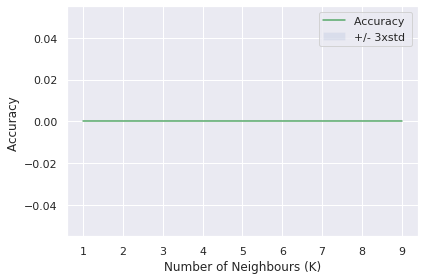

The best accuracy was 0.0 with k= 1


In [49]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was", mean_acc.max(), "with k=", mean_acc.argmax()+1)

<h3> Now generate and store the model on the global train set for the optimal k = 5 </h3>

In [50]:
neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X, y)
neigh

ValueError: Unknown label type: 'unknown'

<h2>KNN Evaluation</h2>
<h3>Jaccard index for accuracy evaluation.</h3>

In [51]:
from sklearn.metrics import jaccard_score
jaccard_score(y_cv, yhat_cv,average='micro')

NameError: name 'yhat_cv' is not defined

<h2>Support Vector Machine (SVM) </h2>

In [ ]:
from sklearn import svm
TCSVM = svm.SVC(kernel='rbf')
TCSVM.fit(X, y)

In [ ]:
#Calculate accuracy and F1 for Support Vector Machine

yhat_svm=TCSVM.predict(X)
svm_jacc_test=metrics.jaccard_score(y, yhat_svm, average ='macro')
svm_f1_test=metrics.f1_score(y, yhat_svm, average ='macro')
svm_cnf_matrix = confusion_matrix(y, yhat_svm)
print("Accuracy is ", svm_jacc_test, " F1 is" , svm_f1_test)
print(classification_report(y, yhat_svm))
svm_cnf_matrix

<h2>Logistic Regression (LR)</h2>

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=1.0, solver='liblinear').fit(X,y)
LR

In [ ]:
yhat_LR = LR.predict(X)

In [ ]:
#Calculate accuracy, F1 and log_loss for Logistic Regression.

yhat_proba_LR = LR.predict_proba(X)
yhat_LR=LR.predict(X)
LR_jacc_test=metrics.jaccard_score(y, yhat_LR, average ='macro')
LR_f1_test=metrics.f1_score(y, yhat_LR, average ='macro')
LR_cnf_matrix = confusion_matrix(y, yhat_LR)
LR_log_loss=metrics.log_loss(y, yhat_proba_LR)
print("Accuracy is ", LR_jacc_test, " F1 is" , LR_f1_test, " log_loss is", LR_log_loss)
print(classification_report(y, yhat_LR))
LR_cnf_matrix

In [ ]:
df_covid_report